In [ ]:
# Import packages
import Pkg

Pkg.add("Plots")
Pkg.add("QuantumWalk")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


Final state: sparsevec([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], [0.2663819417345502, 0.013004823823669865, 0.07702969514176282, 0.2341773985076849, 0.0032859026102919167, 0.43517492565605176, 0.2833585531874134, 0.09205167369547383, 0.08831953102108356, 0.31941636992644784, 0.29751822663837363, 0.2834488978404578, 0.3503055981336594, 0.22066016033847305, 0.356836289552319, 0.11189606162715997], 16)


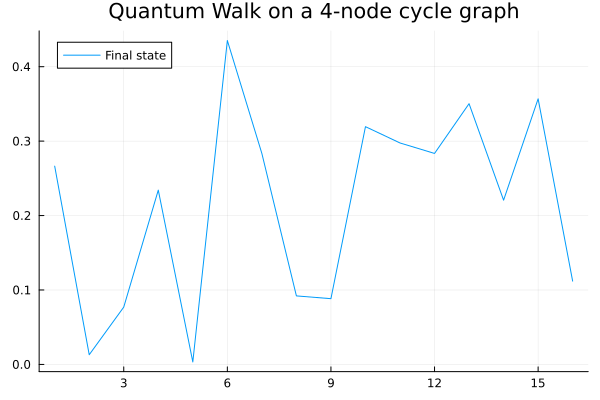

In [7]:
using QuantumWalk
using LightGraphs
using SparseArrays  # Ensure sparse matrix operations
using LinearAlgebra
using Plots

# Define a 4-node cycle graph
n = 4
graph = SimpleGraph(n)
for i in 1:n
    add_edge!(graph, i, mod(i, n) + 1)
end

# Compute the degree vector
deg = degree(graph)

# Construct the row-normalized stochastic matrix
A = adjacency_matrix(graph)  # Get adjacency matrix
P = spzeros(Float64, n, n)  # Create a sparse stochastic matrix

for i in 1:n
    if deg[i] > 0
        P[i, :] = A[i, :] ./ deg[i]  # Normalize by degree
    end
end

# Define Szegedy Quantum Walk
szegedy = Szegedy(graph, P)

# Initial state
state = rand(16); state = sparse(state/norm(state));

# Quantum walk evolution
qwe = QWEvolution(szegedy)
final_state = execute_single(qwe, state, 50)

println("Final state: ", final_state)

x = 1:16

p = plot(x, final_state, label = "Final state", title = "Quantum Walk on a 4-node cycle graph")
# display(p)